In [16]:
from datasets.Torch_datasets import create_data_transforms_EMNIST
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [69]:
train_loader, val_loader, test_loader = create_data_transforms_EMNIST(1, train=True)

### Getting data to numpy
---

In [10]:
def load_data_to_numpy(train_loader, test_loader, val_loader):
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    X_val = []
    y_val = []

    for inputs, labels in train_loader:
        inp = inputs.numpy()[0]
        inp = np.transpose(inp, (1, 2, 0))
        inp = (inp+1)/2.
        inp = inp * 255
        inp = inp.astype(np.uint8)
        inp = cv2.cvtColor(inp, cv2.COLOR_BGR2GRAY)
        out = labels.numpy()[0]
        X_train.append(inp)
        y_train.append(out)
    for inputs, labels in val_loader:
        inp = inputs.numpy()[0]
        inp = np.transpose(inp, (1, 2, 0))
        inp = (inp+1)/2.
        inp = inp * 255
        inp = inp.astype(np.uint8)
        inp = cv2.cvtColor(inp, cv2.COLOR_BGR2GRAY)
        out = labels.numpy()[0]
        X_val.append(inp)
        y_val.append(out)
    for inputs, labels in test_loader:
        inp = inputs.numpy()[0]
        inp = np.transpose(inp, (1, 2, 0))
        inp = (inp+1)/2.
        inp = inp * 255
        inp = inp.astype(np.uint8)
        inp = cv2.cvtColor(inp, cv2.COLOR_BGR2GRAY)
        out = labels.numpy()[0]
        X_test.append(inp)
        y_test.append(out)
    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test), np.array(X_val), np.array(y_val)

In [11]:
X_train, y_train, X_test, y_test, X_val, y_val = load_data_to_numpy(train_loader, test_loader, val_loader)

### Data Visualization
---

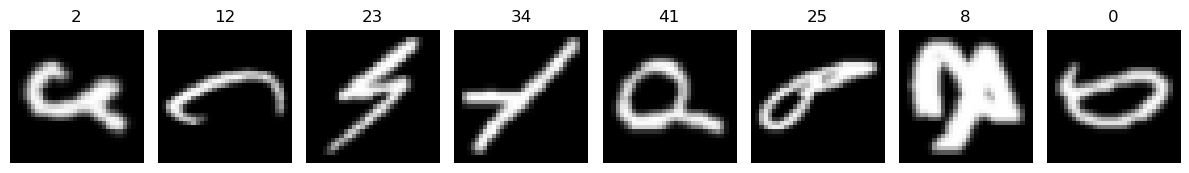

In [70]:
fig, axes = plt.subplots(1, 8, figsize=(12, 6))
for i in range(8):
    col = i % 8
    ax = axes[col]
    image = X_train[i+10]
    ax.imshow(image, cmap='gray')
    ax.set_title(y_train[i+10])
    ax.axis('off')  # Hide the axis

# Adjust spacing
plt.tight_layout()
plt.show()

In [67]:
# Reshaping the given data
_, r, c = X_train.shape
X_train_flat = X_train.reshape(-1, r*c)
X_test_flat = X_test.reshape(-1, r*c)
X_val_flat = X_val.reshape(-1, r*c)

In [68]:
X_train_flat.shape, X_test_flat.shape, X_val_flat.shape

((90240, 1024), (18800, 1024), (22560, 1024))

In [38]:
# total 47 output labels

In [29]:
from sklearn.ensemble import RandomForestClassifier
# to do:-
# choose criterion to 'entropy'
model = RandomForestClassifier(n_estimators=100, max_features=None, criterion='gini', bootstrap=True, random_state=42, n_jobs=-1, verbose=5)

In [30]:
model.fit(X_train_flat, y_train) # 41.9min with 100 estimators 1024 features

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.6min


building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52

[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 18.5min


building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 41.9min finished


RandomForestClassifier(max_features=None, n_jobs=-1, random_state=42, verbose=5)

In [41]:
def accuracy_(y_test, y_pred):
    correct_predictions = np.sum(y_pred == y_test)
    acc = correct_predictions / len(y_test)
    return acc

In [48]:
train_acc = model.score(X_train_flat, y_train)
test_acc = model.score(X_test_flat, y_test)
val_acc = model.score(X_val_flat, y_val)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.8s finished


In [49]:
print("Accuracies of Base Model : ")
print("Train accuracy: ", train_acc)
print("Val accuracy: ", val_acc)
print("Test accuracy: ", test_acc)

Accuracies of Base Model : 
Train accuracy:  1.0
Val accuracy:  0.769104609929078
Test accuracy:  0.7620744680851064


In [50]:
from deslib.des.knora_u import KNORAU
from deslib.des.des_knn import DESKNN

In [57]:
knora_u = KNORAU(model, k=7, knn_classifier='knn', n_jobs=-1)

In [58]:
knora_u.fit(X_val_flat, y_val)

KNORAU(pool_classifiers=RandomForestClassifier(max_features=None, n_jobs=-1,
                                               random_state=42, verbose=5))

In [59]:
y_pred_test_ku = knora_u.predict(X_test_flat)
print("Accuracy using KNORA_U technique:")
print("Test accuracy: ", accuracy_(y_test, y_pred_test_ku))

Accuracy using KNORA_U technique:
Test accuracy:  0.7627659574468085


Tuning Results for KNORA_U :- (Base Model accuracy on Test = 0.7620)
| No. of neighbors | Accuracy |
| :---: | :---: |
| 7 | 0.7627 |
| 13 | 0.7620 |
| 20 | 0.7614 |

##### Random Sampling :-

In [61]:
dist, indx = knora_u.get_competence_region(X_test_flat)
predictions = knora_u._predict_base(X_test_flat)
competence_level = knora_u.estimate_competence(competence_region=indx, distances=dist, predictions=predictions)
selected_classifiers = knora_u.select(competence_level)
def select_with_random_sampling(selected_classifiers, threshold=40):
    print(f"Randomly switching off total of {threshold} models that is selected!")
    sel_clf = np.copy(selected_classifiers)
    for i in range(sel_clf.shape[0]):
        # sel_clf[i] -> bool array for each query sample shape (100, )
        if np.where(sel_clf[i] == False)[0].shape[0] < threshold:
            num_turn_off = threshold - (np.where(sel_clf[i] == False)[0].shape[0])
            indx_true = np.where(sel_clf[i] == True)[0] # tuple
            turn_off_ind = np.random.choice(indx_true, size=num_turn_off, replace=False)
            sel_clf[i][turn_off_ind] = False
    return sel_clf
sel_clf = select_with_random_sampling(selected_classifiers, threshold=40)

Randomly switching off total of 40 models that is selected!


In [62]:
sel_clf, sel_clf.shape

(array([[ True,  True,  True, ...,  True, False,  True],
        [ True, False, False, ...,  True,  True,  True],
        [False, False, False, ..., False, False,  True],
        ...,
        [ True,  True,  True, ...,  True,  True, False],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True, False,  True, ...,  True, False,  True]]),
 (18800, 100))

In [64]:
def predict_with_random_sampling(X_test_flat, selected_clf):
    predictions = knora_u._predict_base(X_test_flat) # get predictions for each base present in the pool of classifiers for each test sample
    dist, indx = knora_u.get_competence_region(X_test_flat)
    competence_level = knora_u.estimate_competence(competence_region=indx, distances=dist, predictions=predictions)
    turn_off = np.where(selected_clf == False)
    predictions[turn_off] = -1
    total_labels = 47
    y_pred = np.zeros(predictions.shape[0])
    for i in range(predictions.shape[0]):
        pred = predictions[i]
        competence = competence_level[i]
        hash = np.zeros(total_labels, dtype='int')
        for j in range(total_labels):
            temp = np.where(pred == j)[0]
            sum_comp = np.sum(competence[temp])
            hash[j] = sum_comp
        y_pred[i] = np.argmax(hash)
    return y_pred

In [65]:
y_pred_random_sampling = predict_with_random_sampling(X_test_flat, selected_clf=sel_clf)

In [66]:
print("Accuracy using KNORA_U with Ramdom Sampling:")
print("Test accuracy: ", accuracy_(y_test, y_pred_random_sampling))

Accuracy using KNORA_U with Ramdom Sampling:
Test accuracy:  0.7606382978723404


Performance of Base Model with 100 estimators :-
| Dataset | Accuracy |
| :---: | :---: |
| Train | 1.0 |
| Validation | 0.7691 |
| Test | 0.7620 |

Final Results for KNORA_U :-  
(Test Data)
| Random Sampling | Accuracy |
| :---: | :---: |
| No | 0.7627 |
| Yes | 0.7606 |

#### DESKNN
---

In [79]:
des_knn = DESKNN(model, k=13, knn_classifier='knn', n_jobs=-1)

In [80]:
des_knn.fit(X_val_flat, y_val)

DESKNN(k=13,
       pool_classifiers=RandomForestClassifier(max_features=None, n_jobs=-1,
                                               random_state=42, verbose=5))

In [81]:
y_pred_test_desknn = des_knn.predict(X_test_flat)
print("Accuracy using DESKNN technique:")
print("Test accuracy: ", accuracy_(y_test, y_pred_test_desknn))

Accuracy using DESKNN technique:
Test accuracy:  0.7594148936170213


Tuning Results for DESKNN :- (Base Model accuracy on Test = 0.7620)
| No. of neighbors | Accuracy |
| :---: | :---: |
| 7 | 0.7583 |
| 13 | 0.7594 |
| 20 | 0.7579 |

##### Random Sampling :-

In [83]:
dist, indx = des_knn.get_competence_region(X_test_flat)

In [84]:
predictions = des_knn._predict_base(X_test_flat)

In [85]:
acc, diversity = des_knn.estimate_competence(competence_region=indx, distances=dist, predictions=predictions)

In [87]:
selected_classifiers = des_knn.select(accuracy=acc, diversity=diversity)

In [88]:
selected_classifiers, selected_classifiers.shape

(array([[14, 68, 93, ..., 51, 41, 92],
        [56, 64, 55, ..., 45, 22, 16],
        [15, 61, 52, ..., 72, 25, 18],
        ...,
        [10, 53, 72, ..., 63, 67, 95],
        [53, 10, 85, ..., 70,  3,  6],
        [34, 76, 92, ..., 37, 32, 15]], dtype=int64),
 (18800, 30))

In [93]:
def select_with_random_sampling(selected_classifiers, threshold=20):
    print(f"Randomly selecting total of {threshold} models that is selected!")
    sel_clf = np.zeros((selected_classifiers.shape[0], threshold))
    for i in range(sel_clf.shape[0]):
        sel_clf[i] = np.random.choice(selected_classifiers[i], threshold, replace=False)
    return sel_clf
sel_clf = select_with_random_sampling(selected_classifiers, threshold=20)

Randomly selecting total of 20 models that is selected!


In [94]:
sel_clf, sel_clf.shape

(array([[19., 92., 11., ..., 37., 35., 84.],
        [29., 61., 33., ..., 16., 34., 64.],
        [ 0., 93., 28., ..., 51., 91., 15.],
        ...,
        [18., 59., 46., ..., 67., 60., 52.],
        [74., 44., 39., ..., 20., 85., 25.],
        [35., 23.,  5., ..., 11., 42., 33.]]),
 (18800, 20))

In [96]:
probabilities = des_knn._predict_proba_base(X_test_flat)

In [98]:
probabilities.shape

(18800, 100, 47)

In [107]:
from deslib.util.aggregation import sum_votes_per_class
def classify_with_ds(predictions, probabilities=None,
                         neighbors=None, distances=None, accuracy=None, diversity=None, selected_clf=None):
    selected_classifiers = selected_clf
    votes = predictions[np.arange(predictions.shape[0])[:, None],
                        selected_classifiers]
    votes = sum_votes_per_class(votes, self.n_classes_)
    predicted_proba = votes / votes.sum(axis=1)[:, None]
    predicted_label = predicted_proba.argmax(axis=1)
    return predicted_label

In [ ]:
y_test_desknn_rs = classify_with_ds(predictions=predictions, probabilities=probabilities)

In [64]:
def predict_with_random_sampling(X_test_flat, selected_clf, predictions):
    turn_off = np.where(selected_clf == False)
    predictions[turn_off] = -1
    total_labels = 47
    y_pred = np.zeros(predictions.shape[0])
    for i in range(predictions.shape[0]):
        pred = predictions[i]
        competence = competence_level[i]
        hash = np.zeros(total_labels, dtype='int')
        for j in range(total_labels):
            temp = np.where(pred == j)[0]
            sum_comp = np.sum(competence[temp])
            hash[j] = sum_comp
        y_pred[i] = np.argmax(hash)
    return y_pred

In [65]:
y_pred_random_sampling = predict_with_random_sampling(X_test_flat, selected_clf=sel_clf)

In [66]:
print("Accuracy using KNORA_U with Ramdom Sampling:")
print("Test accuracy: ", accuracy_(y_test, y_pred_random_sampling))

Accuracy using KNORA_U with Ramdom Sampling:
Test accuracy:  0.7606382978723404
